```{contents}
```

# Local Outlier Factor

* **Local Outlier Factor (LOF)** is an **unsupervised anomaly detection technique**.
* Focuses on detecting **local outliers** — points that are unusual **relative to their neighbors**.
* Distinguishes between:

  * **Local outlier**: Close to a cluster but slightly different from neighbors.
  * **Global outlier**: Far from all clusters, clearly isolated.

---

### **2. Intuition Behind LOF**

* LOF measures **local density deviation**:

  * Points in **sparse regions** compared to their neighbors → anomalies.
  * Uses **k-nearest neighbors (kNN)** to estimate **local density**.
* Key idea: Compare a point’s density with the density of its neighbors.

  * If density is much lower → point is a local outlier.

---

### **3. How LOF Works**

1. Choose **k**, the number of nearest neighbors.
2. For each point:

   * Find its **k nearest neighbors**.
   * Compute the **average distance to neighbors** → estimates local density.
3. Compare **local density** of the point with densities of neighbors:

   * Low density relative to neighbors → high LOF score → outlier.
   * High density relative to neighbors → normal point.

* **LOF score interpretation**:

  * Score ≈ 1 → normal
  * Score > 1 → outlier
  * Higher score → stronger anomaly

---

### **4. Advantages**

* Detects **local anomalies** that global methods (like Isolation Forest) might miss.
* Handles datasets with **clusters of varying densities**.
* Based on **distance metrics**: Euclidean, Manhattan, Minkowski, etc.

---

### **5. Practical Usage**

* Available in **`sklearn.neighbors.LocalOutlierFactor`**.
* Parameters:

  * `n_neighbors`: Number of neighbors to use for density estimation.
  * `metric`: Distance metric (e.g., Euclidean, Manhattan).
  * `contamination`: Expected proportion of outliers.
* Output:

  * **LOF score** for each sample.
  * Can identify local anomalies for further analysis.

---

**Summary**

* LOF is useful for detecting **local deviations in density**.
* Especially effective when data has **clusters with different densities**.
* Uses **k-nearest neighbor distances** to compute **local anomaly scores**.


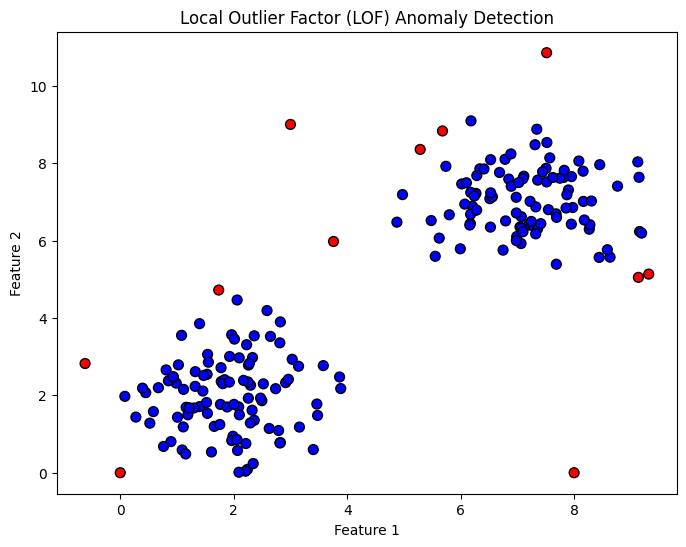

Detected outliers:
[[-0.6197451   2.8219025 ]
 [ 1.73534317  4.72016917]
 [ 7.51504769 10.85273149]
 [ 9.31465857  5.13273481]
 [ 3.75873266  5.97561236]
 [ 9.13303337  5.0479122 ]
 [ 5.67976679  8.83145877]
 [ 5.28686547  8.35387237]
 [ 0.          0.        ]
 [ 8.          0.        ]
 [ 3.          9.        ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate sample data
np.random.seed(42)
# Two clusters
cluster1 = np.random.randn(100, 2) + [2, 2]
cluster2 = np.random.randn(100, 2) + [7, 7]
# Outliers
outliers = np.array([[0, 0], [8, 0], [3, 9]])

# Combine data
X = np.vstack([cluster1, cluster2, outliers])

# Fit Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # 5% expected outliers
y_pred = lof.fit_predict(X)  # -1 = outlier, 1 = inlier
lof_scores = -lof.negative_outlier_factor_  # higher score = more anomalous

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=['red' if i==-1 else 'blue' for i in y_pred], s=50, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.show()

# Print outlier points
print("Detected outliers:")
print(X[y_pred==-1])


**Explanation**

1. We generate **two clusters** and a few **outliers**.
2. `LocalOutlierFactor` computes **LOF score** for each sample based on **k-nearest neighbors**.
3. Points with **low local density** compared to neighbors are marked as **outliers (`-1`)**.
4. We visualize:

   * **Blue points** → normal/inliers
   * **Red points** → detected outliers

---

**Key Notes**

* `n_neighbors`: Controls how “local” the density comparison is.

  * Small `k` → sensitive to local anomalies
  * Large `k` → more like global anomalies
* `contamination`: Expected fraction of anomalies, helps define threshold.
* LOF detects **local anomalies** that might not be far from other clusters but are sparse relative to their neighbors.